## Explanation of neural networks, activation functions, and architectures.

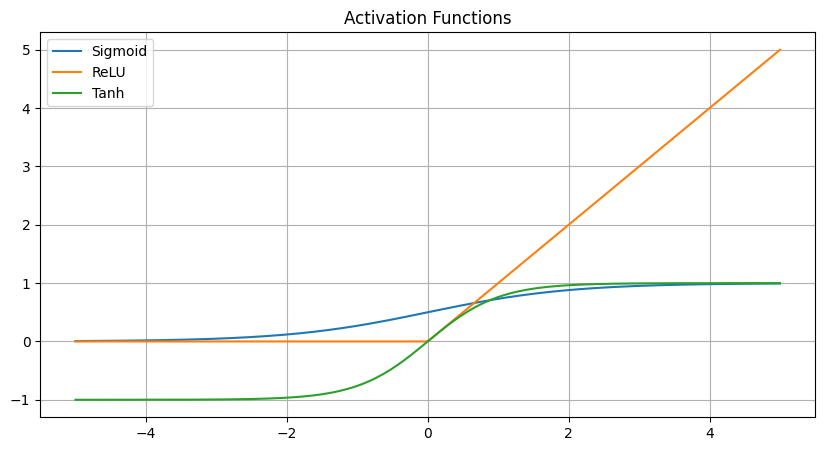

In [1]:
import numpy as np
import matplotlib.pyplot as plt



def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def relu(x):
  return np.maximum(0, x)
def tanh(x):
  return np.tanh(x)

plt.figure(figsize=(10,5))
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, tanh(x), label="Tanh")
plt.legend()
plt.grid()
plt.title("Activation Functions")
plt.show()


In [6]:
x = np.linspace(-5, 5, 200)
x

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

In [7]:
# --------------------------
# Activation Functions
# --------------------------
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return np.where(x > 0, 1, 0)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x) ** 2

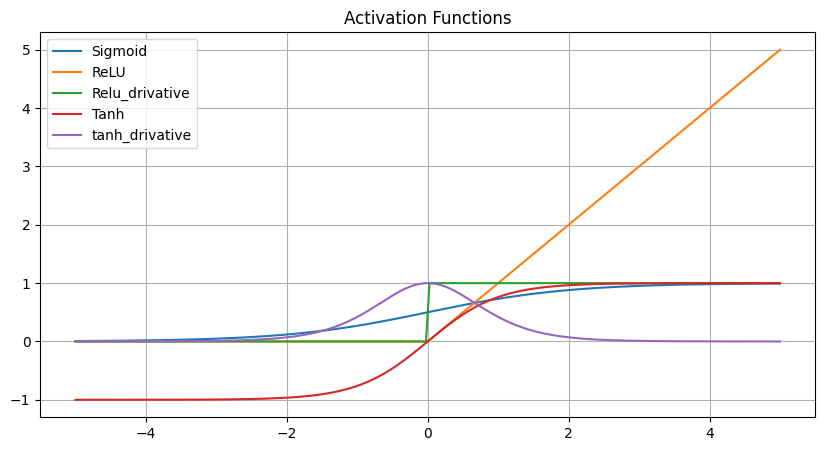

In [8]:
plt.figure(figsize=(10,5))
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x ,relu_deriv(x), label="Relu_drivative")
plt.plot(x, tanh(x), label="Tanh")
plt.plot(x ,tanh_deriv(x), label="tanh_drivative")

plt.legend()
plt.grid()
plt.title("Activation Functions")
plt.show()

In [9]:
activations = {
    "sigmoid": (sigmoid, sigmoid_deriv),
    "relu": (relu, relu_deriv),
    "tanh": (tanh, tanh_deriv)
}


## Training function

In [10]:
def train_nn(hidden_neurons=3, activation_name="sigmoid", learning_rate=0.1):
    """
    Trains a simple 2-layer neural network on the XOR problem.

    Args:
        hidden_neurons (int): Number of neurons in hidden layer
        activation_name (str): Activation function to use ("sigmoid", "relu", "tanh")
        learning_rate (float): Learning rate for gradient descent
    """
    # Select activation
    activation, activation_deriv = activations[activation_name]

    # XOR Dataset
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])

    # Weight initialization
    np.random.seed(42)
    W1 = np.random.randn(2, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, 1)
    b2 = np.zeros((1, 1))

    losses = []

    # Training Loop
    for epoch in range(5000):
        # Forward Pass
        z1 = X @ W1 + b1
        a1 = activation(z1)
        z2 = a1 @ W2 + b2
        a2 = activation(z2)

        # Compute Loss (Mean Squared Error)
        loss = np.mean((y - a2) ** 2)
        losses.append(loss)

        # Backpropagation
        dz2 = (a2 - y) * activation_deriv(z2)
        dW2 = a1.T @ dz2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = dz2 @ W2.T * activation_deriv(z1)
        dW1 = X.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update Weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # --------------------------
    # Results
    # --------------------------
    print(f"Activation: {activation_name}, Hidden Neurons: {hidden_neurons}, Learning Rate: {learning_rate}")
    print("Predictions after training:")
    for inp, pred in zip(X, a2.round(3)):
        print(f"Input: {inp} → Predicted: {pred[0]:.3f}")

    # Plot Loss Curve
    plt.figure(figsize=(6,4))
    plt.plot(losses, label="Training Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.grid(True)
    plt.legend()
    plt.show()


Activation: sigmoid, Hidden Neurons: 3, Learning Rate: 0.1
Predictions after training:
Input: [0 0] → Predicted: 0.059
Input: [0 1] → Predicted: 0.905
Input: [1 0] → Predicted: 0.897
Input: [1 1] → Predicted: 0.129


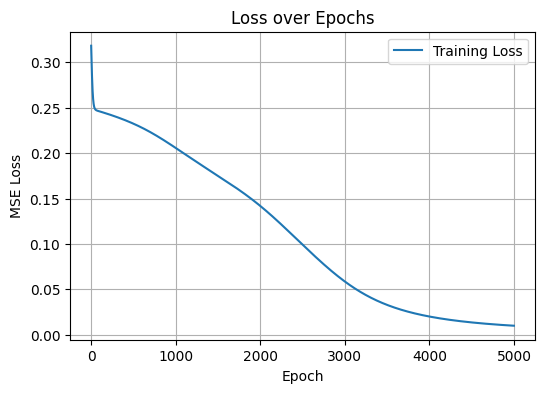

In [11]:
train_nn()